### Phase 3- SQL operations

In [1]:
import sqlite3
import csv
import pandas as pd

In [2]:
db=sqlite3.connect("crime_database")

In [3]:
cursor=db.cursor()

In [4]:
cursor.execute("CREATE TABLE crime_against_women (state UT TEXT,DISTRICT TEXT,Year INT,Rape INT,Kindanpping INT,Dowry Deaths INT,Assault INT,Insult  INT,Cruelty by Husband  INT,Importation of Girls INT) ")
db.commit()

#### 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [6]:
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv','r') as file :
    #here r is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_against_women VALUES(?,?,?,?,?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1
    

In [7]:
print(no_records,'Records Inserted')

9018 Records Inserted


#### 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [9]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kindanpping) FROM crime_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kindanpping DESC")
for row in result:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Rape"', '"Kidnapping and Abduction"')
('"UTTAR PRADESH"', '"TOTAL"', 2012, 3425, 7910)
('"UTTAR PRADESH"', '"TOTAL"', 2011, 3406, 7525)
('"UTTAR PRADESH"', '"TOTAL"', 2010, 3135, 5468)
('"UTTAR PRADESH"', '"TOTAL"', 2009, 2998, 5078)
('"UTTAR PRADESH"', '"TOTAL"', 2008, 2937, 4439)
('"UTTAR PRADESH"', '"TOTAL"', 2007, 3010, 3363)
('"UTTAR PRADESH"', '"TOTAL"', 2001, 2851, 2879)
('"UTTAR PRADESH"', '"TOTAL"', 2006, 2900, 2551)
('"UTTAR PRADESH"', '"TOTAL"', 2004, 2875, 2324)
('"UTTAR PRADESH"', '"TOTAL"', 2002, 2891, 2298)
('"UTTAR PRADESH"', '"TOTAL"', 2005, 2921, 2256)
('"RAJASTHAN"', '"TOTAL"', 2003, 2738, 1750)


* The state, district and year with district with Highest Rape and Kidnapping i.e  UTTAR PRADESH in year 2011 with 3425 rape and 7910 Kidnapping cases

#### 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [11]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MIN(Rape), MIN(Kindanpping) FROM crime_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Kindanpping")
for row in result:
    print(row)

('"A & N ISLANDS"', '"NICOBAR"', 2001, 0, 0)
('"ANDHRA PRADESH"', '"GUNTAKAL RLY."', 2001, 0, 0)
('"ARUNACHAL PRADESH"', '"TAWANG"', 2001, 0, 0)
('"ASSAM"', '"C.I.D."', 2001, 0, 0)
('"BIHAR"', '"ARWAL"', 2001, 0, 0)
('"CHHATTISGARH"', '"BIZAPUR"', 2001, 0, 0)
('"DAMAN & DIU"', '"DIU"', 2001, 0, 0)
('"DELHI"', '"S.T.F."', 2001, 0, 0)
('"GUJARAT"', '"W.RLY"', 2001, 0, 0)
('"HARYANA"', '"GRP"', 2002, 0, 0)
('"HIMACHAL PRADESH"', '"G.R.P."', 2001, 0, 0)
('"JAMMU & KASHMIR"', '"CRIME JAMMU"', 2001, 0, 0)
('"JHARKHAND"', '"DEOGHAR"', 2001, 0, 0)
('"KARNATAKA"', '"CHITRADURGA"', 2001, 0, 0)
('"KERALA"', '"CBCID"', 2001, 0, 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 2001, 0, 0)
('"MADHYA PRADESH"', '"INDORE RLY."', 2001, 0, 0)
('"MAHARASHTRA"', '"MUMBAI RLY."', 2001, 0, 0)
('"MANIPUR"', '"CHURACHANDPUR"', 2001, 0, 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 2001, 0, 0)
('"MIZORAM"', '"AIZAWL"', 2001, 0, 0)
('"NAGALAND"', '"KIPHIRE"', 2001, 0, 0)
('"ODISHA"', '"RAYAGADA"', 2001, 0, 0)
('"PUDUCHERRY"', '

* All the above result showing Minimum of Rape And KIdnapping in each state And year.

### 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [12]:
cursor.execute("CREATE TABLE crime_against_st (state UT TEXT,DISTRICT TEXT,Year INT,Murder INT,Rape INT,Kidanpping INT,Dacoity INT,Robbery INT,Arson  INT,Hurt INT,PCR INT,POA INT,Other Crimes INT) ")
db.commit()

In [23]:
with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv','r') as file :
    #where r is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_against_st VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1

In [24]:
print(no_records,'Records Inserted')

9019 Records Inserted


### 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [26]:
result=cursor.execute("SELECT State UT,DISTRICT ,Year, MAX(Dacoity), MAX(Robbery) FROM crime_against_st WHERE NOT DISTRICT ='TOTAL'  ")
for row in result:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Dacoity"', '"Robbery"')


### 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [27]:
result=cursor.execute("SELECT State UT,DISTRICT, Murder FROM crime_against_st WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st) GROUP BY state ")
for row in result:
    print(row)

('"A & N ISLANDS"', '"ANDAMAN"', 0)
('"ANDHRA PRADESH"', '"ADILABAD"', 0)
('"ARUNACHAL PRADESH"', '"CHANGLANG"', 0)
('"ASSAM"', '"BARPETA"', 0)
('"BIHAR"', '"ARWAL"', 0)
('"CHANDIGARH"', '"CHANDIGARH"', 0)
('"CHHATTISGARH"', '"BALRAMPUR"', 0)
('"D & N HAVELI"', '"D and N HAVELI"', 0)
('"DAMAN & DIU"', '"DAMAN"', 0)
('"DELHI"', '"CENTRAL"', 0)
('"GOA"', '"NORTH GOA"', 0)
('"GUJARAT"', '"AHMEDABAD COMMR."', 0)
('"HARYANA"', '"AMBALA"', 0)
('"HIMACHAL PRADESH"', '"BILASPUR"', 0)
('"JAMMU & KASHMIR"', '"ANANTNAG"', 0)
('"JHARKHAND"', '"BOKARO"', 0)
('"KARNATAKA"', '"BAGALKOT"', 0)
('"KERALA"', '"ALAPUZHA"', 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 0)
('"MADHYA PRADESH"', '"BETUL"', 0)
('"MAHARASHTRA"', '"AKOLA"', 0)
('"MANIPUR"', '"BISHNUPUR"', 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 0)
('"MIZORAM"', '"AIZAWL"', 0)
('"NAGALAND"', '"DIMAPUR"', 0)
('"ODISHA"', '"ANGUL"', 0)
('"PUDUCHERRY"', '"PONDICHERRY"', 0)
('"PUNJAB"', '"AMRITSAR"', 0)
('"RAJASTHAN"', '"AJMER"', 0)
('"SIKKIM"', '"NORTH"', 0

* The Above result of query shows the minimum number of Murdrs happened in eah Ditsrict

### 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

In [28]:
result=cursor.execute("SELECT  state, DISTRICT, Year,Murder FROM crime_against_st GROUP BY state ORDER BY Murder  ")
for row in result:
    print(row)

('"A & N ISLANDS"', '"ANDAMAN"', 2001, 0)
('"ANDHRA PRADESH"', '"ADILABAD"', 2001, 0)
('"ARUNACHAL PRADESH"', '"CHANGLANG"', 2001, 0)
('"ASSAM"', '"BARPETA"', 2001, 0)
('"CHANDIGARH"', '"CHANDIGARH"', 2001, 0)
('"CHHATTISGARH"', '"BALRAMPUR"', 2001, 0)
('"D & N HAVELI"', '"D and N HAVELI"', 2001, 0)
('"DAMAN & DIU"', '"DAMAN"', 2001, 0)
('"DELHI"', '"CENTRAL"', 2001, 0)
('"GOA"', '"NORTH GOA"', 2001, 0)
('"GUJARAT"', '"AHMEDABAD COMMR."', 2001, 0)
('"HARYANA"', '"AMBALA"', 2001, 0)
('"HIMACHAL PRADESH"', '"BILASPUR"', 2001, 0)
('"JAMMU & KASHMIR"', '"ANANTNAG"', 2001, 0)
('"JHARKHAND"', '"BOKARO"', 2001, 0)
('"KARNATAKA"', '"BAGALKOT"', 2001, 0)
('"KERALA"', '"ALAPUZHA"', 2001, 0)
('"LAKSHADWEEP"', '"LAKSHADWEEP"', 2001, 0)
('"MANIPUR"', '"BISHNUPUR"', 2001, 0)
('"MEGHALAYA"', '"GARO HILLS EAST"', 2001, 0)
('"MIZORAM"', '"AIZAWL"', 2001, 0)
('"NAGALAND"', '"DIMAPUR"', 2001, 0)
('"ODISHA"', '"ANGUL"', 2001, 0)
('"PUDUCHERRY"', '"PONDICHERRY"', 2001, 0)
('"PUNJAB"', '"AMRITSAR"', 2001, 0

### 3.8.1Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [29]:
import pandas as pd

In [30]:
cursor.execute ("CREATE TABLE crime_ipc(STATE UT TEXT,DISTRICT TEXT,YEAR INT, MURDER INT,ATTEMPT_to_MURDER INT,RAPE INT) ")

In [31]:
db.commit()

In [33]:
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv','r') as file :
    #here r is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_ipc VALUES(?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1

In [34]:
print(no_records,'Records Inserted')

9018 Records Inserted


#### 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [35]:
result=cursor.execute("SELECT  state UT, Year,DISTRICT ,MAX(MURDER) FROM crime_ipc women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY MURDER DESC")
for row in result:
    print(row)

('STATE/UT', 'YEAR', 'DISTRICT', 'MURDER')
('BIHAR', 2004, 'PATNA', 542)
('UTTAR PRADESH', 2001, 'MUZAFFARNAGAR', 324)
('MAHARASHTRA', 2001, 'MUMBAI', 295)
('JHARKHAND', 2002, 'RANCHI', 270)
('WEST BENGAL', 2010, 'PASCHIM MIDNAPUR', 268)
('KARNATAKA', 2010, 'BANGALORE COMMR.', 266)
('GUJARAT', 2002, 'AHMEDABAD COMMR.', 222)
('ANDHRA PRADESH', 2001, 'RANGA REDDY', 214)
('TAMIL NADU', 2012, 'CHENNAI', 180)
('JAMMU & KASHMIR', 2001, 'BARAMULLA', 144)
('ASSAM', 2007, 'TINSUKIA', 143)
('MADHYA PRADESH', 2004, 'JHABUA', 139)
('CHHATTISGARH', 2006, 'BIZAPUR', 139)
('TRIPURA', 2003, 'WEST', 136)
('DELHI UT', 2002, 'NORTH WEST', 135)
('ODISHA', 2009, 'KEONJHAR', 109)
('RAJASTHAN', 2011, 'ALWAR', 104)
('UTTARAKHAND', 2001, 'HARIDWAR', 94)
('HARYANA', 2006, 'GURGAON', 93)
('PUNJAB', 2010, 'CP LUDHIANA', 90)
('NAGALAND', 2008, 'DIMAPUR', 64)
('MANIPUR', 2007, 'IMPHAL WEST', 61)
('KERALA', 2002, 'TRIVANDRUM', 58)
('MEGHALAYA', 2003, 'JAINTIA HILLS', 52)
('HIMACHAL PRADESH', 2003, 'KANGRA', 38)
('GO

#### 3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [40]:
#.3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year
data=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kindanpping) FROM crime_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kindanpping DESC")
for row in data:
    print(row)

('"STATE/UT"', '"DISTRICT"', '"Year"', '"Rape"', '"Kidnapping and Abduction"')
('"UTTAR PRADESH"', '"TOTAL"', 2012, 3425, 7910)
('"UTTAR PRADESH"', '"TOTAL"', 2011, 3406, 7525)
('"UTTAR PRADESH"', '"TOTAL"', 2010, 3135, 5468)
('"UTTAR PRADESH"', '"TOTAL"', 2009, 2998, 5078)
('"UTTAR PRADESH"', '"TOTAL"', 2008, 2937, 4439)
('"UTTAR PRADESH"', '"TOTAL"', 2007, 3010, 3363)
('"UTTAR PRADESH"', '"TOTAL"', 2001, 2851, 2879)
('"UTTAR PRADESH"', '"TOTAL"', 2006, 2900, 2551)
('"UTTAR PRADESH"', '"TOTAL"', 2004, 2875, 2324)
('"UTTAR PRADESH"', '"TOTAL"', 2002, 2891, 2298)
('"UTTAR PRADESH"', '"TOTAL"', 2005, 2921, 2256)
('"RAJASTHAN"', '"TOTAL"', 2003, 2738, 1750)


####3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

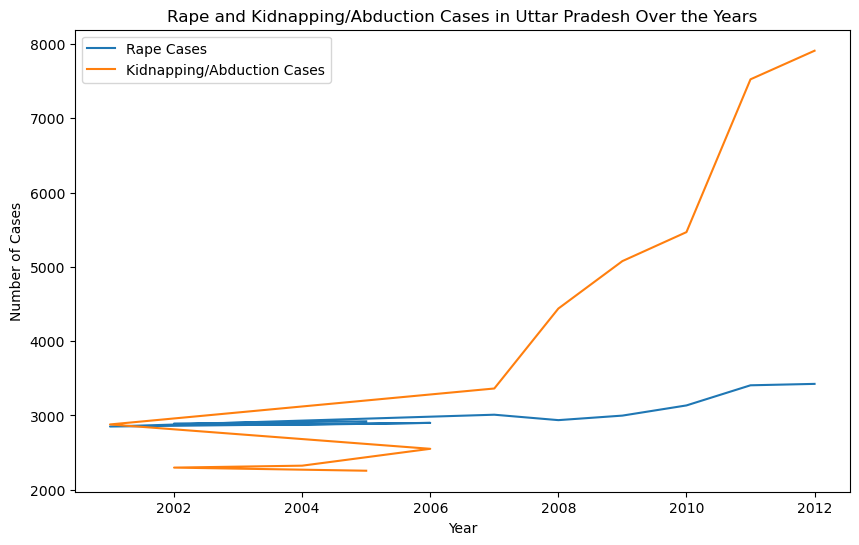

In [1]:
import matplotlib.pyplot as plt

# Provided data
data = [
    ('"UTTAR PRADESH"', '"TOTAL"', 2012, 3425, 7910),
    ('"UTTAR PRADESH"', '"TOTAL"', 2011, 3406, 7525),
    ('"UTTAR PRADESH"', '"TOTAL"', 2010, 3135, 5468),
    ('"UTTAR PRADESH"', '"TOTAL"', 2009, 2998, 5078),
    ('"UTTAR PRADESH"', '"TOTAL"', 2008, 2937, 4439),
    ('"UTTAR PRADESH"', '"TOTAL"', 2007, 3010, 3363),
    ('"UTTAR PRADESH"', '"TOTAL"', 2001, 2851, 2879),
    ('"UTTAR PRADESH"', '"TOTAL"', 2006, 2900, 2551),
    ('"UTTAR PRADESH"', '"TOTAL"', 2004, 2875, 2324),
    ('"UTTAR PRADESH"', '"TOTAL"', 2002, 2891, 2298),
    ('"UTTAR PRADESH"', '"TOTAL"', 2005, 2921, 2256),
    ('"RAJASTHAN"', '"TOTAL"', 2003, 2738, 1750)
]

# Extracting data for Uttar Pradesh
up_years = [entry[2] for entry in data if entry[0] == '"UTTAR PRADESH"']
up_rape_cases = [entry[3] for entry in data if entry[0] == '"UTTAR PRADESH"']
up_kidnapping_cases = [entry[4] for entry in data if entry[0] == '"UTTAR PRADESH"']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(up_years, up_rape_cases, label='Rape Cases')
plt.plot(up_years, up_kidnapping_cases, label='Kidnapping/Abduction Cases')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Rape and Kidnapping/Abduction Cases in Uttar Pradesh Over the Years')
plt.legend()

# Display the plot
plt.show()


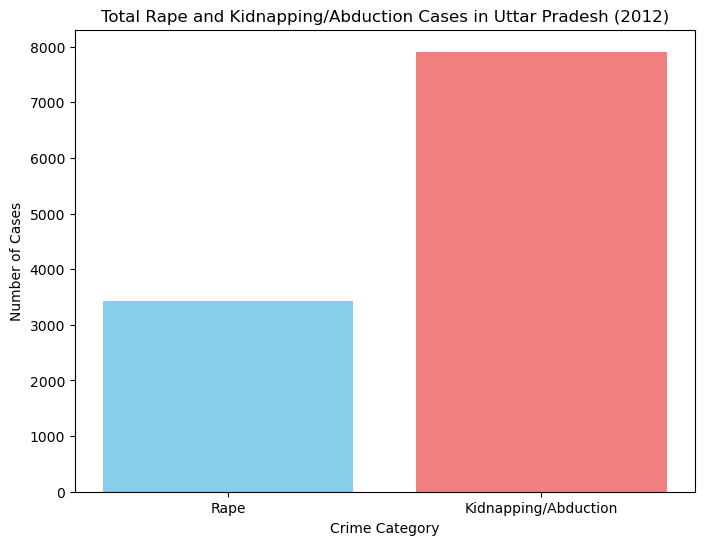

In [2]:
import matplotlib.pyplot as plt

# Provided data
data = [
    ('"UTTAR PRADESH"', '"TOTAL"', 2012, 3425, 7910),
    ('"UTTAR PRADESH"', '"TOTAL"', 2011, 3406, 7525),
    ('"UTTAR PRADESH"', '"TOTAL"', 2010, 3135, 5468),
    ('"UTTAR PRADESH"', '"TOTAL"', 2009, 2998, 5078),
    ('"UTTAR PRADESH"', '"TOTAL"', 2008, 2937, 4439),
    ('"UTTAR PRADESH"', '"TOTAL"', 2007, 3010, 3363),
    ('"UTTAR PRADESH"', '"TOTAL"', 2001, 2851, 2879),
    ('"UTTAR PRADESH"', '"TOTAL"', 2006, 2900, 2551),
    ('"UTTAR PRADESH"', '"TOTAL"', 2004, 2875, 2324),
    ('"UTTAR PRADESH"', '"TOTAL"', 2002, 2891, 2298),
    ('"UTTAR PRADESH"', '"TOTAL"', 2005, 2921, 2256),
    ('"RAJASTHAN"', '"TOTAL"', 2003, 2738, 1750)
]

# Extracting data for Uttar Pradesh in the year 2012
up_2012_data = [entry for entry in data if entry[0] == '"UTTAR PRADESH"' and entry[2] == 2012]
categories = ['Rape', 'Kidnapping/Abduction']
values = [up_2012_data[0][3], up_2012_data[0][4]]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.xlabel('Crime Category')
plt.ylabel('Number of Cases')
plt.title('Total Rape and Kidnapping/Abduction Cases in Uttar Pradesh (2012)')

# Display the plot
plt.show()
